# Predicting the extent of regional drought in one weeks time

The USDM keeps statistics on the percentage of drought in different major climatic regions of the contiguous United States. 
This is a large enough area that the drought data doesn't just immediately jump from zero to 100%. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We consider comprehensive statistics -- that is the percentage (of land area) that each climate region is in the D0-D4 drought categories.

## Overview of the data 

In [2]:
dm_data= pd.read_csv("../Data/climate_region_comprehensive_D0_through_D4.csv")
dm_data

,MapDate,Region,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID
0,20231010,High Plains,57.12,42.88,27.48,15.26,5.44,0.97,2023-10-10,2023-10-16,1
1,20231010,Midwest,16.15,83.85,55.51,21.95,6.14,0.35,2023-10-10,2023-10-16,1
2,20231010,Northeast,83.24,16.76,2.47,0.27,0.00,0.00,2023-10-10,2023-10-16,1
3,20231010,South,15.63,84.37,66.02,48.72,27.77,11.61,2023-10-10,2023-10-16,1
4,20231010,Southeast,40.27,59.73,27.26,8.68,1.26,0.00,2023-10-10,2023-10-16,1
...,...,...,...,...,...,...,...,...,...,...,...
7441,20000104,Midwest,26.35,73.65,41.30,7.29,0.00,0.00,2000-01-04,2000-01-10,1
7442,20000104,Northeast,92.83,7.17,2.58,0.00,0.00,0.00,2000-01-04,2000-01-10,1
7443,20000104,South,14.90,85.10,57.90,30.74,0.00,0.00,2000-01-04,2000-01-10,1
7444,20000104,Southeast,28.58,71.42,42.59,19.20,0.00,0.00,2000-01-04,2000-01-10,1


In [3]:
regions = set(dm_data["Region"])
regions

{'High Plains', 'Midwest', 'Northeast', 'South', 'Southeast', 'West'}

### Visualization of drought data from different counties

Before training our model, we look at what this data looks like from different climate regions in the U.S. 

In [4]:
def get_region(region_name):
    return dm_data.loc[dm_data["Region"] == region_name][::-1] # make in chronological order

In [5]:
def plot_region(region_name):
    region = get_region(region_name)

    fig, axs = plt.subplots(1,1,sharex=True,sharey=True,figsize=(15,5))
    axs.fill_between(x=region["ValidEnd"],y1=0,y2=region["D0"],color="k",alpha=0.1,label="D0")
    axs.fill_between(x=region["ValidEnd"],y1=0,y2=region["D1"],color="k",alpha=0.3,label="D1")
    axs.fill_between(x=region["ValidEnd"],y1=0,y2=region["D2"],color="k",alpha=0.5,label="D2")
    axs.fill_between(x=region["ValidEnd"],y1=0,y2=region["D3"],color="k",alpha=0.7,label="D3")
    axs.fill_between(x=region["ValidEnd"],y1=0,y2=region["D4"],color="k",alpha=0.9,label="D4")
    axs.set_xticks(axs.get_xticks()[::156])
    axs.set_xlabel("Date") 
    axs.set_ylabel("Percentage in drought")
    axs.legend()
    fig.suptitle(region_name)
    plt.tight_layout()

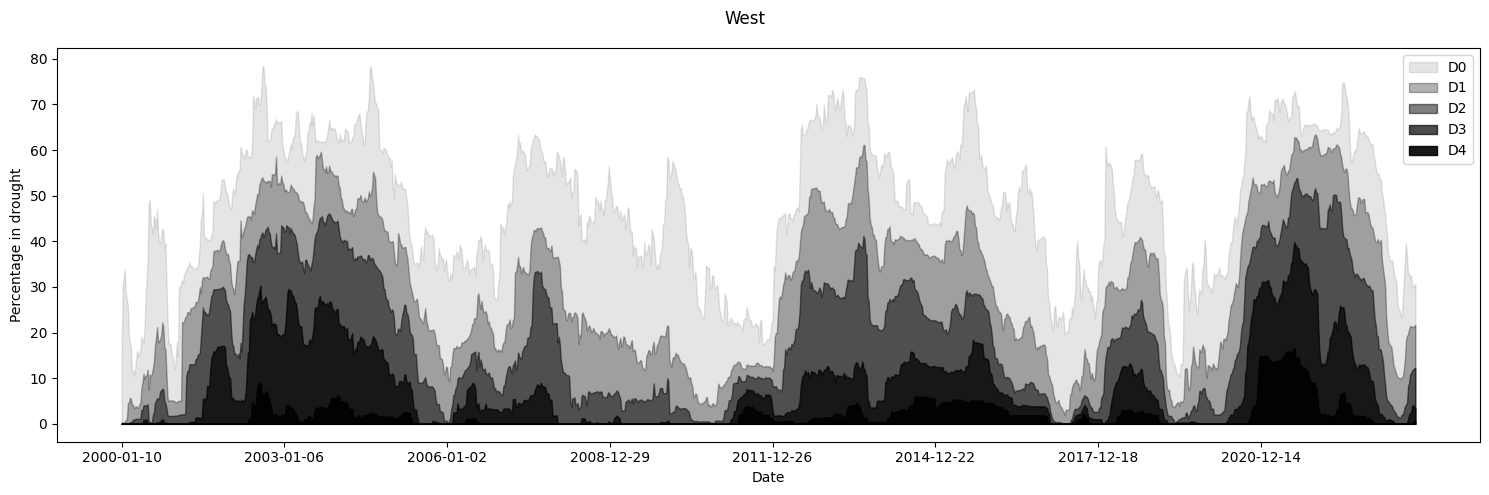

In [6]:
plot_region("West")

### Summary statistics

Our main takeaway from this qualitative analysis is that drought appears to have been much more extensive and severe in the West/High Plains of the U.S., while drought has been least common in the northeast. 
We can see this a different way by considering the mean and standard deviations of the different drought levels.

In [7]:
for region in regions:
    print(f"Mean drought of {region}:")
    print(f"\t D0: {np.mean(get_region(region)['D0']):.4f} +/- {np.std(get_region(region)['D0']):.2f}")
    print(f"\t D1: {np.mean(get_region(region)['D1']):.4f} +/- {np.std(get_region(region)['D1']):.2f}")
    print(f"\t D2: {np.mean(get_region(region)['D2']):.4f} +/- {np.std(get_region(region)['D2']):.2f}")
    print(f"\t D3: {np.mean(get_region(region)['D3']):.4f} +/- {np.std(get_region(region)['D3']):.2f}")
    print(f"\t D4: {np.mean(get_region(region)['D4']):.4f} +/- {np.std(get_region(region)['D4']):.2f}")

Mean drought of Southeast:
	 D0: 39.2310 +/- 29.43
	 D1: 21.4408 +/- 23.92
	 D2: 11.2094 +/- 16.72
	 D3: 5.0416 +/- 9.92
	 D4: 1.4285 +/- 4.48
Mean drought of High Plains:
	 D0: 54.4743 +/- 26.79
	 D1: 34.3974 +/- 26.74
	 D2: 20.2624 +/- 21.57
	 D3: 8.9396 +/- 13.60
	 D4: 1.8907 +/- 4.80
Mean drought of Northeast:
	 D0: 21.0219 +/- 22.17
	 D1: 6.6900 +/- 12.76
	 D2: 1.8622 +/- 6.12
	 D3: 0.3138 +/- 1.64
	 D4: 0.0042 +/- 0.10
Mean drought of Midwest:
	 D0: 29.4902 +/- 21.20
	 D1: 13.6443 +/- 15.12
	 D2: 4.8602 +/- 7.85
	 D3: 1.2314 +/- 3.33
	 D4: 0.0552 +/- 0.46
Mean drought of West:
	 D0: 47.8946 +/- 15.61
	 D1: 30.6061 +/- 16.51
	 D2: 18.9620 +/- 14.58
	 D3: 8.4200 +/- 9.15
	 D4: 1.8778 +/- 3.11
Mean drought of South:
	 D0: 47.2636 +/- 25.78
	 D1: 30.5705 +/- 23.22
	 D2: 17.8956 +/- 18.12
	 D3: 8.5366 +/- 12.27
	 D4: 2.8582 +/- 7.33


#### How Gaussian is the data? 
We consider histograms of the data and QQ plots.

In [33]:
def normal(x, mu, sig):
    return 1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)

def plot_region_hist(region_name):
    """
    Compare data (normalized to have zero mean and unit variance)
    to a Gaussian with zero mean and unit variance.
    """
    region = get_region(region_name)

    fig, axs = plt.subplots(1,5,sharex=False,sharey=True,figsize=(15,5))
    for i in range(5):
        D = region[f"D{i}"]
        D -= np.mean(D)
        D /= np.std(D)
        axs[i].hist(D,density=True,color="k")
        axs[i].set_title(f"D{i}")
        xv = np.linspace(np.min(D),np.max(D))
        yv = normal(xv, np.mean(xv), np.std(xv))
        axs[i].plot(xv,yv)
    axs[0].set_ylabel("Relative amount of time")
    fig.suptitle(region_name)
    plt.tight_layout()

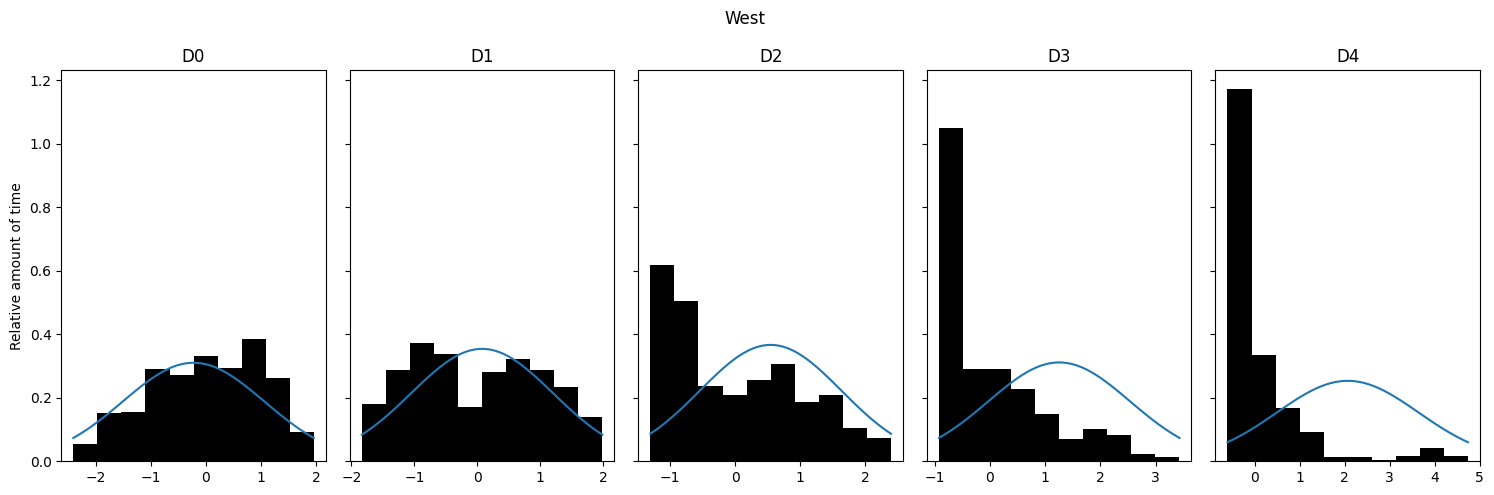

In [34]:
plot_region_hist("West")

We see that the D0 region drought percentages look approximately normally distributed, but not the higher drought values, which are piled up near x percent.
We can see this a different way by looking at QQ-plots.

In [35]:
import statsmodels
from statsmodels.graphics.gofplots import qqplot

def plot_region_qq(region_name):
    """
    Compare data (set to zero mean and unit variance) to Normal distribution in a QQ plot.
    """
    region = get_region(region_name)

    fig, axs = plt.subplots(1,5,sharex=False,sharey=True,figsize=(15,5))
    for i in range(5):
        D = region[f"D{i}"]
        D -= np.mean(D)
        D /= np.std(D)
        qqplot(D,ax=axs[i])
        axs[i].set_title(f"D{i}")
    fig.suptitle(region_name)
    plt.tight_layout()

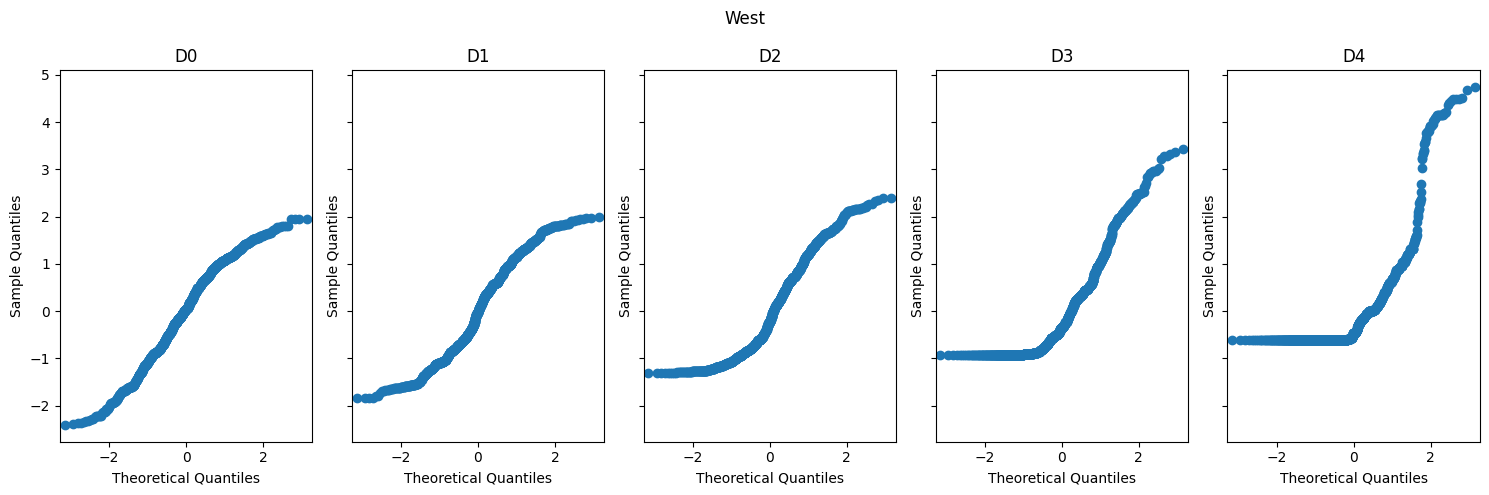

In [11]:
plot_region_qq("West")

# Training various prediction models on drought data

We would like to give some function a timestream of data that lists the percentage of D0-D4 for a county, and for that function to predict for us the percentages of D0-D4 one week from now. 
We consider several time series prediction models, culminating in an LSTM recurrent neural network model.

We roughly follow [this tutorial](https://machinelearningmastery.com/lstm-for-time-series-prediction-in-pytorch/) and [this tutorial](https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/) to set up our LSTM recurrent neural network.

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

## Making the train and test datasets

We rescale the data so that it has zero mean and unit variance.
We then make a sliding window of the data.

In [13]:
def get_region_train_test(region_name, category, train_size):
    """
    Get the regional data, normalize to have zero mean and unit variance, and return a train and test set.
    """
    region = get_region(region_name)

    timeseries = np.array(region[[category]])

    mean = np.mean(timeseries)
    std  = np.std(timeseries)
    
    timeseries -= mean
    timeseries /= std
    
    train = timeseries[:train_size]
    test  = timeseries[train_size:]

    return timeseries, np.array([mean,std]), train, test

In [14]:
def create_windowed_dataset(dataset, window_size):
    """Transform a time series into a prediction dataset
    
    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        window_size: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-window_size):
        feature = dataset[i:i+window_size]
        target = dataset[i+1:i+window_size+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X).type(torch.float32), torch.tensor(y).type(torch.float32)

In [15]:
region_name = "West"
category = "D1"

window_size= 8 # 8 weeks = 2 months of window_size
train_size = 1000
timeseries, mean_std, train_set, test_set = get_region_train_test(region, category, train_size)

X_train, y_train = create_windowed_dataset(train_set, window_size=window_size)
X_test, y_test   = create_windowed_dataset(test_set,  window_size=window_size)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([992, 8, 1]) torch.Size([992, 8, 1])
torch.Size([233, 8, 1]) torch.Size([233, 8, 1])


/tmp/ipykernel_46472/2615600964.py:14: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  return torch.tensor(X).type(torch.float32), torch.tensor(y).type(torch.float32)


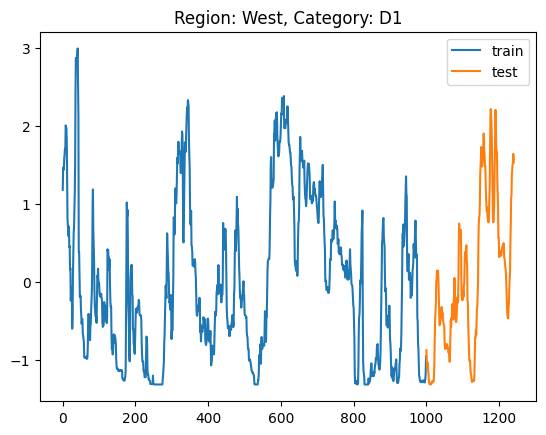

In [16]:
plt.plot(range(train_size),train_set,label="train")
plt.plot(range(train_size,train_size+len(test_set)),test_set,label="test")
plt.title(f"Region: {region_name}, Category: {category}")
plt.legend()

## Persistence model forecast

We first consider forecasting data using a persistence model forecast model.
This model predicts the amount of drought one week from now by simply taking the value of drought one week in the past.
This is a very crude model, but it is very fast and requires no training or hyperparameter tuning.

In [17]:
def persistence_model(data,steps):
    return np.array([x for x in data[:-steps]])

In [18]:
predictions_1 = persistence_model(timeseries,1)
predictions_2 = persistence_model(timeseries,2)
predictions_4 = persistence_model(timeseries,4)

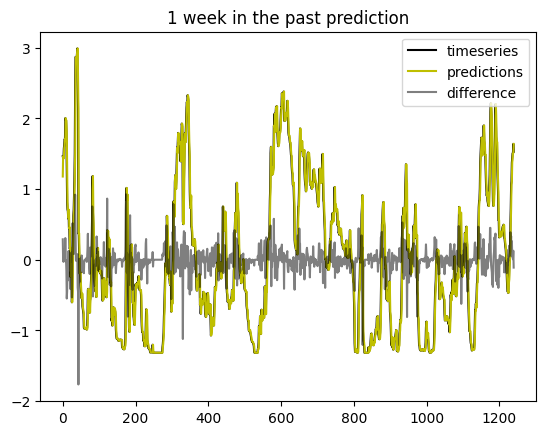

In [19]:
plt.plot(timeseries[1:],              color="k",alpha=1.0,label="timeseries")
plt.plot(predictions_1,               color="y",alpha=1.0,label="predictions")
plt.plot(timeseries[1:]-predictions_1,color="k",alpha=0.5,label="difference")
plt.title("1 week in the past prediction")
plt.legend()

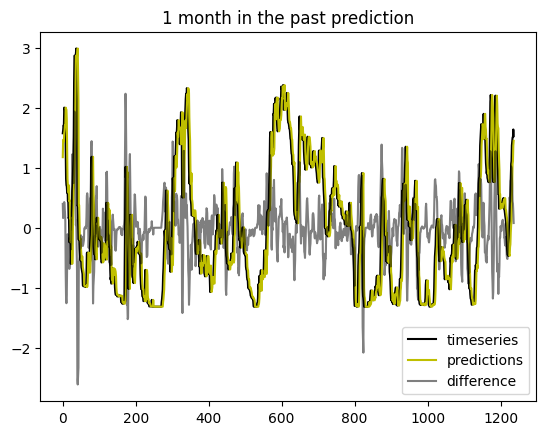

In [20]:
plt.plot(timeseries[4:],              color="k",alpha=1.0,label="timeseries")
plt.plot(predictions_4,               color="y",alpha=1.0,label="predictions")
plt.plot(timeseries[4:]-predictions_4,color="k",alpha=0.5,label="difference")
plt.title("1 month in the past prediction")
plt.legend()

We see that a persistence model does extremely well at predicting future drought.
That is, using the extent of drought last week (or even last month) is a fairly good indicator of the extent of drought this week.
We can see this more quantitively by looking at the root mean squared error of the prediction functions as compared to the timestream.

\begin{align}
    RMSE = \sqrt{\frac{1}{N}\sum_{i=1}^N\left(y^{(pred)}_i - y^{(data)}_i\right)^2}
    .
\end{align}

In [21]:
loss_fn = nn.MSELoss()
rmse_persistence_1 = np.sqrt(loss_fn(torch.tensor(timeseries[1:]),torch.tensor(predictions_1)))
rmse_persistence_2 = np.sqrt(loss_fn(torch.tensor(timeseries[2:]),torch.tensor(predictions_2)))
rmse_persistence_4 = np.sqrt(loss_fn(torch.tensor(timeseries[4:]),torch.tensor(predictions_4)))
print(rmse_persistence_1)
print(rmse_persistence_2)
print(rmse_persistence_4)

tensor(0.1829, dtype=torch.float64)
tensor(0.3009, dtype=torch.float64)
tensor(0.4818, dtype=torch.float64)


## LSTM Recurrent neural network

In [22]:
class DroughtModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = x[:, -1, :] # only last time step
        x = self.linear(x)
        return x

model = DroughtModel()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

In [23]:
def predict_n_advance(data, steps, model):
    new = data
    for _ in range(steps):
        tmp = model(data)
        print(tmp)
        new = torch.tensor([[x] for x in torch.cat((data,torch.tensor([tmp])))])

In [24]:
n_epochs = 100
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch[:,-1,:])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 10 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train[:,-1,:]))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test[:,-1,:]))
    print(f"Epoch {epoch}: train RMSE {train_rmse:.4f}, test RMSE {test_rmse:.4f}")

Epoch 0: train RMSE 0.3943, test RMSE 0.4050
Epoch 10: train RMSE 0.1860, test RMSE 0.1462
Epoch 20: train RMSE 0.1777, test RMSE 0.1397
Epoch 30: train RMSE 0.1745, test RMSE 0.1380
Epoch 40: train RMSE 0.1736, test RMSE 0.1412
Epoch 50: train RMSE 0.1717, test RMSE 0.1360
Epoch 60: train RMSE 0.1709, test RMSE 0.1391
Epoch 70: train RMSE 0.1707, test RMSE 0.1415
Epoch 80: train RMSE 0.1716, test RMSE 0.1369
Epoch 90: train RMSE 0.1662, test RMSE 0.1387


Notice that the out-of-sample (test) RMSE is roughly that same size as the RMSE as the persistence model forcast (for one week in the past)!

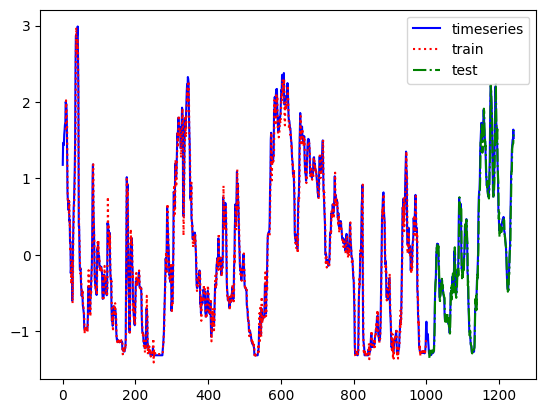

In [25]:
with torch.no_grad():
    # shift train predictions for plotting
    train_plot = np.ones_like(timeseries) * np.nan
    y_pred = model(X_train)
    y_pred = y_pred
    train_plot[window_size:train_size] = model(X_train)
    # shift test predictions for plotting
    test_plot = np.ones_like(timeseries) * np.nan
    test_plot[train_size+window_size:len(timeseries)] = model(X_test)
# plot
plt.plot(timeseries, c='b', linestyle="-",  label="timeseries")
plt.plot(train_plot, c='r', linestyle=":",  label="train")
plt.plot(test_plot,  c='g', linestyle="-.", label="test")
plt.legend()
plt.show()

# Cross-validating our model on the other climate regions

The ultimate test of our model is to see if it can fit data from the other climate regions. The model seems to do unreasonably well at predicting future drought.

In [26]:
region_name = "Midwest"
category = "D3"

window_size= 8 # 8 weeks = 2 months of window_size
train_size = 1000
timeseries, mean_std, train_set, test_set = get_region_train_test(region, category, train_size)

X_train, y_train = create_windowed_dataset(timeseries, window_size=window_size)

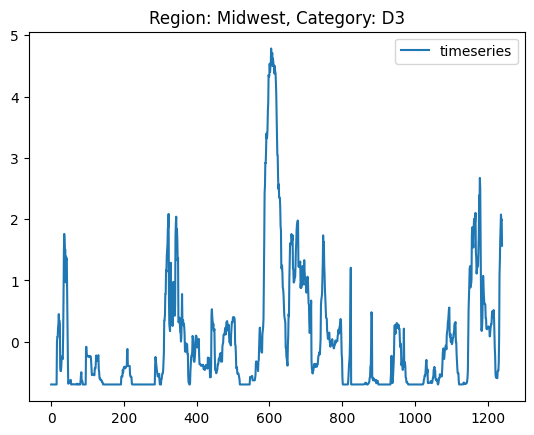

In [27]:
plt.plot(timeseries,label="timeseries")
plt.title(f"Region: {region_name}, Category: {category}")
plt.legend()

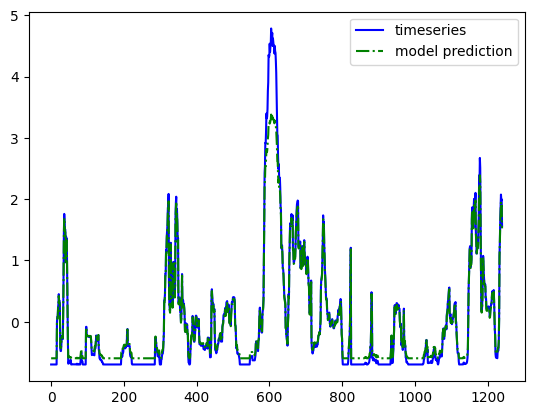

In [28]:
with torch.no_grad():
    # shift train predictions for plotting
    y_pred = model(torch.tensor([[x] for x in timeseries]).type(torch.float32))

plt.plot(timeseries, c='b', linestyle="-",  label="timeseries")
plt.plot(y_pred,     c='g', linestyle="-.", label="model prediction")
plt.legend()
plt.show()

### Comparing the persistence model and LSTM model on the cross-validation data

We compare the RMSE of both the persistence and LSTM model.

In [29]:
persistence_1 = persistence_model(timeseries,1)

rmse_pnr_1 = np.sqrt(loss_fn(torch.tensor(timeseries[1:]),torch.tensor(persistence_1)))
rmse_lstm  = np.sqrt(loss_fn(torch.tensor(timeseries)    ,torch.tensor(y_pred)))

print(rmse_pnr_1)
print(rmse_lstm)

tensor(0.1779, dtype=torch.float64)
tensor(0.1849, dtype=torch.float64)


/tmp/ipykernel_46472/2552052703.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rmse_lstm  = np.sqrt(loss_fn(torch.tensor(timeseries)    ,torch.tensor(y_pred)))


We see that the persistence and LSTM model perform similarly on the new climate region data.

## Another check: run our model on completely different data (airline passengers)

We run our LSTM model on airline passenger data (obtained from [this tutorial](https://machinelearningmastery.com/lstm-for-time-series-prediction-in-pytorch/)), to see how well it does on something completely different.

In [30]:
from scipy import signal

df = pd.read_csv("arline_passengers.csv")
timeseries = df["Passengers"].values.astype('float32')

timeseries = np.array([[x] for x in signal.detrend(timeseries)])

timeseries -= np.mean(timeseries)
timeseries /= np.std(timeseries)

# train-test split for time series
train_size = int(len(timeseries) * 0.67)
test_size = len(timeseries) - train_size
train, test = timeseries[:train_size], timeseries[train_size:]

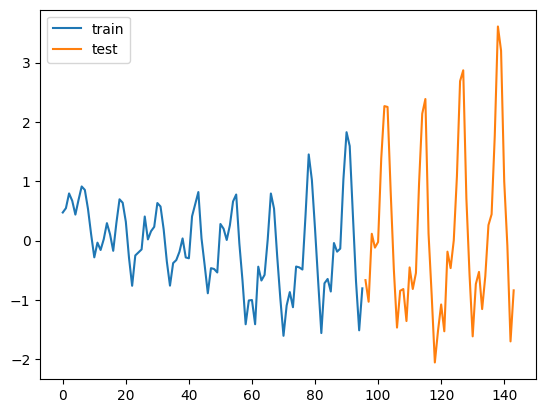

In [31]:
X_train, y_train = create_windowed_dataset(train, window_size=window_size)
X_test, y_test = create_windowed_dataset(test,    window_size=window_size)
plt.plot(range(len(train)),train,label="train")
plt.plot(range(len(train),len(train)+len(test)),test,label="test")
plt.legend()

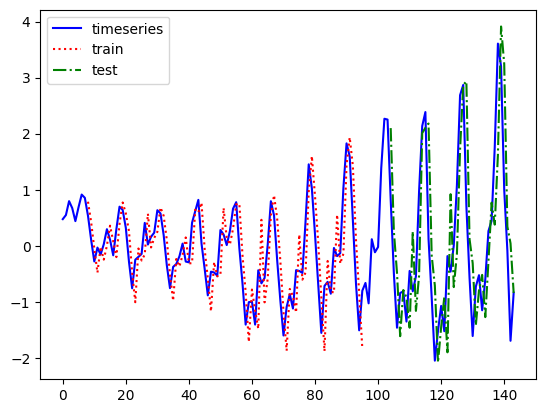

In [32]:
with torch.no_grad():
    # shift train predictions for plotting
    train_plot = np.ones_like(timeseries) * np.nan
    y_pred = model(X_train)
    y_pred = y_pred
    train_plot[window_size:train_size] = model(X_train)
    # shift test predictions for plotting
    test_plot = np.ones_like(timeseries) * np.nan
    test_plot[train_size+window_size:len(timeseries)] = model(X_test)
# plot
plt.plot(timeseries, c='b', linestyle="-",  label="timeseries")
plt.plot(train_plot, c='r', linestyle=":",  label="train")
plt.plot(test_plot,  c='g', linestyle="-.", label="test")
plt.legend()
plt.show()